In [1]:
#baca dataset
from pandas import read_csv
import matplotlib.pyplot as plt

In [9]:
dt = read_csv('C:/Users/sitimariyah/CODING/Deep Learning/deep_learning_with_python/dataset/international-airline-passengers.csv', usecols=[1], 
                  engine='python', skipfooter=3)
dt.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


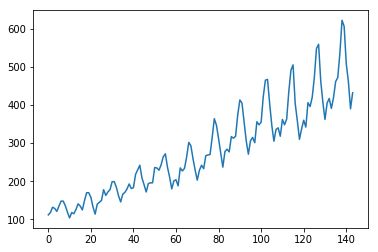

In [3]:
plt.plot(dt)
plt.show()

In [4]:
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy
numpy.random.seed(7)

In [10]:
dataset = dt.values
dataset = dataset.astype('float32')
dataset[0:10]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.]], dtype=float32)

In [11]:
#lakukan normalisasi nilai menjadi 0-1
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset[0:10]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753]], dtype=float32)

In [12]:
#bagi data menjadi training dan testing
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset),: ]
print(len(train))
print(len(test))

96
48


In [13]:
#agar mendapatkan format data ke time t dan data ke time t+1
#maka kita buat dua variabel dalam masing-masing baris
#misal variabel X sbg data time ke t dan Y data ke time+1
#fungsi create_dataset untuk melakukan transformasi data tersebut
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [48]:
# transformasi dataset agar berbentuk X dan Y
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [49]:
# transformasi dataset menjadi [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1, testX.shape[1]))
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
in_dim = (trainX.shape[2], trainX.shape[1])
print(in_dim)

(94, 1, 1)
(46, 1, 1)
(94,)
(1, 1)


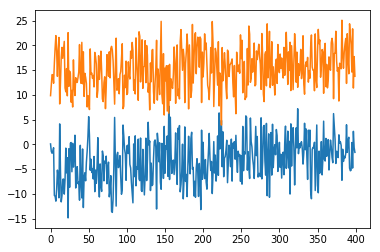

In [34]:
def create_data(n):
    x1 = np.array([i/100+np.random.uniform(-1,3) for i in range(n)]).reshape(n,1)
    x2 = np.array([i/100+np.random.uniform(-3,5)+2 for i in range(n)]).reshape(n,1)
    x3 = np.array([i/100+np.random.uniform(-6,5)-3 for i in range(n)]).reshape(n,1)

    y1= [x1[i]-x2[i]+x3[i]+np.random.uniform(-2,2) for i in range(n)]
    y2= [x1[i]+x2[i]-x3[i]+5+np.random.uniform(-1,3) for i in range(n)]
    X = np.hstack((x1, x2, x3))
    Y = np.hstack((y1, y2))
    return X, Y

x, y = create_data(n=400)
plt.plot(y)
plt.show()

In [35]:
print(x.shape)
print(y.shape)
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)
print(y.shape)
in_dim = (x.shape[1], x.shape[2])
out_dim = y.shape[1]
print(in_dim)
print(out_dim)

(400, 3)
(400, 2)
(400, 3, 1)
(3, 1)
2


In [43]:
#membuat model Multi Layer Perceptron(MLP) dan memfitkan ke dataset
model = Sequential()
model.add(LSTM(4, input_shape=in_dim))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
 - 1s - loss: 0.0399
Epoch 2/100
 - 0s - loss: 0.0188
Epoch 3/100
 - 0s - loss: 0.0140
Epoch 4/100
 - 0s - loss: 0.0130
Epoch 5/100
 - 0s - loss: 0.0121
Epoch 6/100
 - 0s - loss: 0.0112
Epoch 7/100
 - 0s - loss: 0.0103
Epoch 8/100
 - 0s - loss: 0.0093
Epoch 9/100
 - 0s - loss: 0.0085
Epoch 10/100
 - 0s - loss: 0.0076
Epoch 11/100
 - 0s - loss: 0.0068
Epoch 12/100
 - 0s - loss: 0.0059
Epoch 13/100
 - 0s - loss: 0.0052
Epoch 14/100
 - 0s - loss: 0.0046
Epoch 15/100
 - 0s - loss: 0.0040
Epoch 16/100
 - 0s - loss: 0.0035
Epoch

In [50]:
#melakukan prediksi untuk data training dan testing
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [51]:
#invers hasil prediksi ke nilai sebenarnya (tidak di MinMaxScaling)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [52]:
#estimasi performance model
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' %(trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' %(testScore))

Train Score: 23.00 RMSE
Test Score: 48.69 RMSE


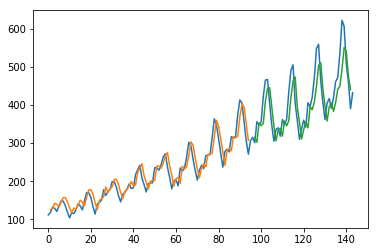

In [54]:
#simpan hasil prediksi training untuk plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

#simpan hasil prediksi testing untuk plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :]=testPredict

#plot baseline dan hasil prediksi
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Kalau contoh di atas, kita memprediksi data Y dengan satu variabel X. Sekarang memprediksi data Y dengan tiga variabel yaitu X1, X2, dan X3

In [55]:
# mengubah fungsi create_dataset untuk mentransformasi data
# menjadi X1, X2, X3, dan Y
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [56]:
#kita reshape dataset ke bentuk yang diinginkan di atas dengan ukuran train dan test yang sama seperti sebelumnya
#data train sudah dinormalisasi (proses scaling sudah dilakukan sebelumnya)
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [57]:
# transformasi dataset menjadi [samples, time steps, features]
# time steps menyatakan berapa step yang dibutuhkan untuk mencapai Y
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
in_dim = (trainX.shape[1], trainX.shape[2])
print(in_dim)

(92, 3, 1)
(44, 3, 1)
(92,)
(3, 1)


In [64]:
#membuat model MLP dan memfitkan ke dataset
model2 = Sequential()
model2.add(LSTM(4, input_shape=in_dim, activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.summary()
model2.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
 - 1s - loss: 0.0527
Epoch 2/200
 - 0s - loss: 0.0336
Epoch 3/200
 - 0s - loss: 0.0233
Epoch 4/200
 - 0s - loss: 0.0172
Epoch 5/200
 - 0s - loss: 0.0143
Epoch 6/200
 - 0s - loss: 0.0129
Epoch 7/200
 - 0s - loss: 0.0124
Epoch 8/200
 - 0s - loss: 0.0118
Epoch 9/200
 - 0s - loss: 0.0113
Epoch 10/200
 - 0s - loss: 0.0108
Epoch 11/200
 - 0s - loss: 0.0103
Epoch 12/200
 - 0s - loss: 0.0098
Epoch 13/200
 - 0s - loss: 0.0092
Epoch 14/200
 - 0s - loss: 0.0086
Epoch 15/200
 - 0s - loss: 0.0082
Epoch 16/200
 - 0s - loss: 0.0076
Epoch

In [65]:
#melakukan prediksi untuk data training dan testing
trainPredict = model2.predict(trainX)
testPredict = model2.predict(testX)

In [74]:
#konversi ke nilai aslinya sebelum di MinMaxScaling
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [75]:
#estimasi performance model
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' %(trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' %(testScore))

Train Score: 23.56 RMSE
Test Score: 82.73 RMSE


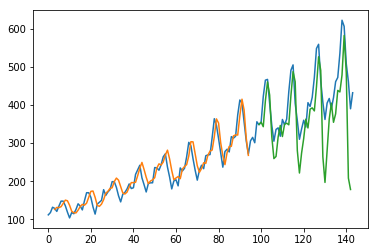

In [76]:
#simpan hasil prediksi training untuk plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

#simpan hasil prediksi testing untuk plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :]=testPredict

#plot baseline dan hasil prediksi
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()